En este experimento correremos kNN con distintos k para distintos tamanios de dataset. Primero corremos un script para el build de las librerias de c++ como modulos de python. Analizaremos con mas profunidad estos resultados en el informe dado junto a esta entrega.

In [ ]:
!sh build.sh

In [23]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from pathlib import Path
import time
from utils import get_MNIST_XY
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
X_all, y_all = get_MNIST_XY(0.8, 70000)

In [14]:
cant_imagenes = [100, 500, 1000, 5000, 10000, 20000, 50000, 70000]
best_ks = [3, 4, 6, 7, 10]

In [37]:
accuracies = np.zeros((len(best_ks), len(cant_imagenes)))
durations = np.zeros((len(best_ks), len(cant_imagenes)))
for i, k in enumerate(best_ks):
    for j, cant in enumerate(cant_imagenes):
        y = y_all.astype(int)[:cant]
        X = X_all.astype(int)[:cant]
        limit = int(0.8 * X.shape[0]) 
        X_train, y_train = X[:limit], y[:limit]
        X_val, y_val = X[limit:], y[limit:]

        assert len(X_train) == len(y_train)
        assert len(X_val) == len(y_val)

        print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

        start =  time.process_time()
        clf_metnum = metnum.KNNClassifier(k)
        clf_metnum.fit(X_train, y_train)
        clf_mentum_predicted = clf_metnum.predict(X_val)
        end = time.process_time()
        accuracies[i, j] = accuracy_score(clf_mentum_predicted, y_val)
        durations[i, j] = end - start

Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación
Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación
Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación
Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación
Ahora tengo 80 instancias de entrenamiento y 20 de validación
Ahora tengo 400 instancias de entrenamiento y 100 de validación
Ahora tengo 800 instancias de entrenamiento y 200 de validación


In [38]:
accuracies

array([[0.6  , 0.88 , 0.91 ],
       [0.65 , 0.88 , 0.92 ],
       [0.55 , 0.84 , 0.92 ],
       [0.5  , 0.81 , 0.915],
       [0.6  , 0.79 , 0.88 ]])

In [20]:
durations

array([[0.00172163, 0.0192603 , 0.08665362],
       [0.00113377, 0.01964731, 0.0822527 ],
       [0.00153239, 0.02013593, 0.07803797],
       [0.00127273, 0.01883942, 0.07331332],
       [0.00136436, 0.01925307, 0.07388445]])

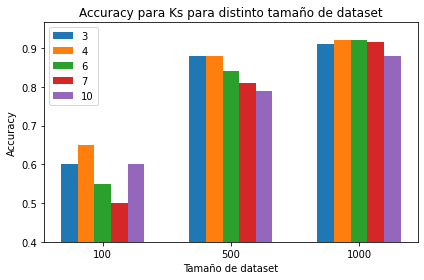

In [36]:
x = np.arange(len(cant_imagenes))  # the label locations
width = 0.13
fig, ax = plt.subplots()
positions = [x - 2 * width, x - width, x, x + width, x + 2 * width]
for index, k in enumerate(best_ks):
    rects1 = ax.bar(positions[index], accuracies[index], width, label=k)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Tamaño de dataset')
ax.set_title('Accuracy para Ks para distinto tamaño de dataset')
ax.set_xticks(x)
ax.set_ylim(0.4)
ax.set_xticklabels(cant_imagenes)
ax.legend()

fig.tight_layout()

plt.show()

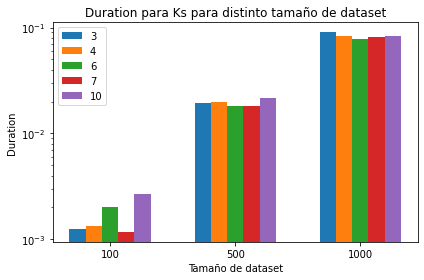

In [42]:
x = np.arange(len(cant_imagenes))  # the label locations
width = 0.13
fig, ax = plt.subplots()
positions = [x - 2 * width, x - width, x, x + width, x + 2 * width]
for i, k in enumerate(best_ks):
    rects = ax.bar(positions[i], durations[i], width, label=k)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration')
ax.set_xlabel('Tamaño de dataset')
ax.set_title('Duration para Ks para distinto tamaño de dataset')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(cant_imagenes)
ax.legend()

fig.tight_layout()

plt.show()